In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Data_Science/auto-mpg.csv")

Mounted at /content/drive


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [7]:
df = df.drop('car name',axis=1)

In [8]:
# Replacing the categorical variable with actual values
df['origin'] = df['origin'].replace({1:'america',2:'europe',3:'asia'})

#verifying the mnewly replaced values
df.origin.value_counts()

america    249
asia        79
europe      70
Name: origin, dtype: int64

In [9]:
# getting dummies for the origin attribute.

df = pd.get_dummies(df, columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


Text(0.5, 1.0, 'Correlation between different fearures')

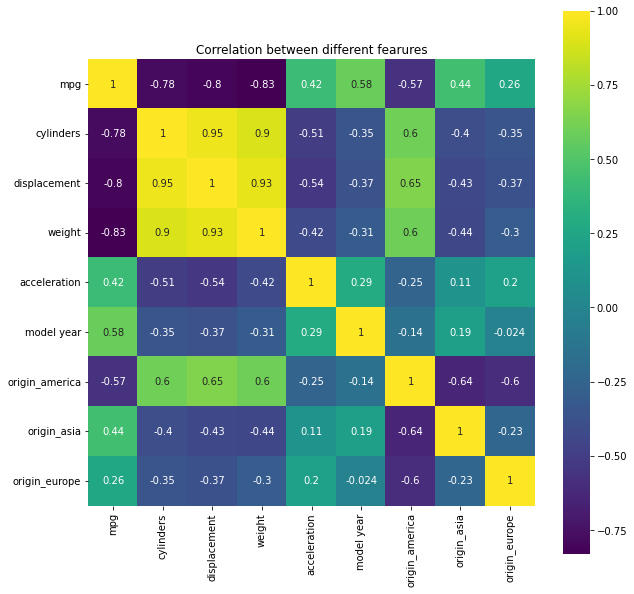

In [10]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [11]:
df = df.replace('?',np.nan) 
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['horsepower'] = df['horsepower'].astype('float64')

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [13]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [14]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [15]:
##Covariance Matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00251889  0.95311615  0.84340357  0.89827376 -0.50669259 -0.34962425
   0.60587351 -0.39747745 -0.35375026]
 [ 0.95311615  1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656
   0.65304807 -0.4345974  -0.37482828]
 [ 0.84340357  0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495
   0.48664074 -0.31977555 -0.28358966]
 [ 0.89827376  0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654
   0.59990539 -0.44192714 -0.29959526]
 [-0.50669259 -0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274
  -0.25143771  0.10941904  0.20498781]
 [-0.34962425 -0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889
  -0.1402352   0.19358712 -0.02455059]
 [ 0.60587351  0.65304807  0.48664074  0.59990539 -0.25143771 -0.1402352
   1.00251889 -0.64493702 -0.59870268]
 [-0.39747745 -0.4345974  -0.31977555 -0.44192714  0.10941904  0.19358712
  -0.64493702  1.00251889 -0.23047449]
 [-0.35375026 -0.37482828 -0.28358966 -0.29959526  0.20498781 -0.02455059
  -0

Text(0.5, 1.0, 'Correlation between different features')

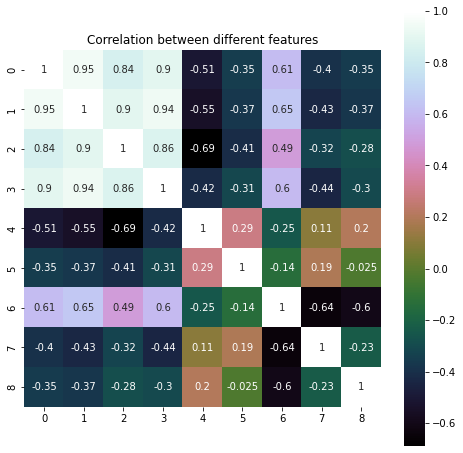

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [17]:
#eigen decomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 4.17291719e-01  9.24997092e-03  3.36473202e-02 -1.00196032e-01
   2.74734702e-01  7.03029641e-01  2.42708007e-01 -4.31246638e-01
   8.80354846e-15]
 [ 4.33269107e-01  5.53511995e-03  2.60153686e-02 -8.65912878e-02
   2.01087962e-01  1.64906108e-01  3.38261636e-02  8.57495068e-01
  -5.44223919e-15]
 [ 4.07975679e-01 -3.73470995e-02  2.45608081e-01 -1.66918084e-01
   4.80715824e-02 -5.96427522e-01  6.02721155e-01 -1.50554328e-01
   2.94452388e-15]
 [ 4.10560439e-01 -3.49279377e-02 -2.99854477e-02 -1.52853531e-01
   3.95261884e-01 -3.12629123e-01 -7.07623298e-01 -2.26400485e-01
  -5.92860573e-15]
 [-2.72599829e-01 -2.54922992e-02 -4.63941329e-01  2.87018549e-01
   7.33898773e-01 -1.37222560e-01  2.63368464e-01  2.48572660e-02
   1.56930753e-15]
 [-1.89733721e-01  3.61541425e-01 -3.70832462e-01 -8.31073062e-01
   6.13100814e-03 -7.64068143e-03  6.82831533e-02  1.81990635e-02
   2.66348587e-16]
 [ 3.29665735e-01  1.77591149e-01 -5.19631907e-01  2.32882115e-01
  -3.07646906e

In [19]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.0387535484928545
1.295073513961539
1.1905833909673444
0.7062501412759029
0.5682377321466366
0.12944636786422933
0.06178871784508019
0.03253661263533329
1.4792263826521538e-15


In [21]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

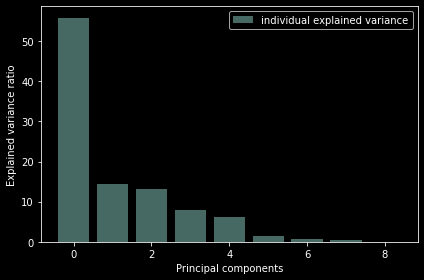

In [22]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(9), var_exp, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [25]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(9,1), 
                      eig_pairs[1][1].reshape(9,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.41729172  0.00924997]
 [ 0.43326911  0.00553512]
 [ 0.40797568 -0.0373471 ]
 [ 0.41056044 -0.03492794]
 [-0.27259983 -0.0254923 ]
 [-0.18973372  0.36154143]
 [ 0.32966574  0.17759115]
 [-0.22363589  0.50868848]
 [-0.18476854 -0.75868596]]


In [27]:
Y = X_std.dot(matrix_w)
Y

array([[ 2.74492781e+00, -3.47915316e-01],
       [ 3.43911060e+00, -3.83048389e-01],
       [ 3.07040180e+00, -3.54833227e-01],
       [ 2.91172331e+00, -3.64709171e-01],
       [ 2.95276092e+00, -3.41809411e-01],
       [ 4.58348190e+00, -4.24010904e-01],
       [ 5.02789640e+00, -4.35486388e-01],
       [ 4.94531373e+00, -4.24976563e-01],
       [ 5.02098226e+00, -4.52512649e-01],
       [ 4.24584541e+00, -3.84096889e-01],
       [ 3.71520032e+00, -3.66933848e-01],
       [ 3.64970786e+00, -3.42824343e-01],
       [ 3.71778824e+00, -3.50012716e-01],
       [ 4.37099973e+00, -3.97216163e-01],
       [-1.50706549e+00,  5.81602722e-01],
       [ 7.53992986e-01, -3.35041882e-01],
       [ 7.50887686e-01, -3.34508864e-01],
       [ 4.86541050e-01, -3.19621173e-01],
       [-1.71642814e+00,  6.02222263e-01],
       [-2.82697381e+00, -2.66815935e+00],
       [-1.63149057e+00, -2.71437798e+00],
       [-1.43245758e+00, -2.67971142e+00],
       [-1.71512760e+00, -2.71025832e+00],
       [-1.

Text(0, 0.5, 'Cumulative explained variance')

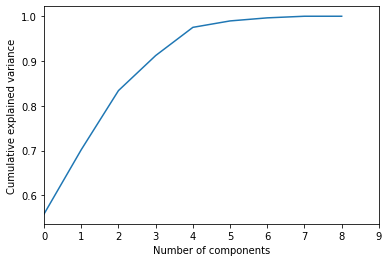

In [28]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,9,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [29]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [30]:
print(Y_sklearn)

[[ 2.74492781e+00  3.47915316e-01]
 [ 3.43911060e+00  3.83048389e-01]
 [ 3.07040180e+00  3.54833227e-01]
 [ 2.91172331e+00  3.64709171e-01]
 [ 2.95276092e+00  3.41809411e-01]
 [ 4.58348190e+00  4.24010904e-01]
 [ 5.02789640e+00  4.35486388e-01]
 [ 4.94531373e+00  4.24976563e-01]
 [ 5.02098226e+00  4.52512649e-01]
 [ 4.24584541e+00  3.84096889e-01]
 [ 3.71520032e+00  3.66933848e-01]
 [ 3.64970786e+00  3.42824343e-01]
 [ 3.71778824e+00  3.50012716e-01]
 [ 4.37099973e+00  3.97216163e-01]
 [-1.50706549e+00 -5.81602722e-01]
 [ 7.53992986e-01  3.35041882e-01]
 [ 7.50887686e-01  3.34508864e-01]
 [ 4.86541050e-01  3.19621173e-01]
 [-1.71642814e+00 -6.02222263e-01]
 [-2.82697381e+00  2.66815935e+00]
 [-1.63149057e+00  2.71437798e+00]
 [-1.43245758e+00  2.67971142e+00]
 [-1.71512760e+00  2.71025832e+00]
 [-1.02559980e+00  2.67486314e+00]
 [ 6.64402173e-01  3.17829336e-01]
 [ 4.21519347e+00  4.92648057e-01]
 [ 3.61938897e+00  4.80175991e-01]
 [ 3.92340091e+00  4.75738772e-01]
 [ 3.35849528e+00  5

In [31]:
Y.shape

(398, 2)

In [32]:
Y_sklearn.shape

(398, 2)

In [33]:
X_std.shape

(398, 9)

In [34]:
y.shape

(398,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, y, train_size=0.8, random_state=123)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

19.772124046087256

In [38]:
lr.coef_

array([-2.94813226,  0.86083077])

In [39]:
# In sample score
lr.score(X_train,y_train) 

0.7477144002247188

In [40]:
intercept = lr.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 23.505616517834223


Conclusion

---
By using Principal Component Analysis, reduced the number of features to 2 and achieved a mean squared error of 19% as compared to 13% when all columns were considered.
